# **MINERIA DE DATOS - PARCIAL 2** 💻

> 🙋🏻‍♂️ **Juan Andres Garcia Alves de Borba** (DNI 30182100)

## 📌 Parte 1. **Setup Inicial**

👉🏻 Importación de librerías y configuraciones generales ...

In [11]:
import numpy as np
import pandas as pd
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [25]:
# suprimir los warnings (si los hubiera) para que no molesten
warnings.filterwarnings("ignore")

# mayor ancho en los 'print()' antes que se generen saltos de línea
np.set_printoptions(linewidth=130)                # saltos de línea (otra opción: linewidth=np.inf)
np.set_printoptions(precision=4, suppress=True)   # 4 decimales en lugar de notación científica

👉🏻 Cargar el dataset ...

In [2]:
df = pd.read_excel("Parcial 02 - Libros (preprocesado).xlsx", sheet_name="Datos")

👉🏻 Visualizar las descripciones de cada columna ...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Titulo              161 non-null    object
 1   Prom. Palabras      161 non-null    int64 
 2   Links Referencias   161 non-null    int64 
 3   Cant. Comentarios   161 non-null    int64 
 4   Present. Videos     161 non-null    int64 
 5   Criticas Negaticas  161 non-null    int64 
 6   Copias Vendidas     161 non-null    int64 
 7   Categoría           161 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 10.2+ KB


👉🏻 Inspección inicial ...

In [5]:
df.head(3)

,Titulo,Prom. Palabras,Links Referencias,Cant. Comentarios,Present. Videos,Criticas Negaticas,Copias Vendidas,Categoría
0,What is Machine Learning and how do we use it ...,1888,1,2,2,34,200000,0
1,10 Companies Using Machine Learning in Cool Ways,1742,9,2,9,5,25000,0
2,How Artificial Intelligence Is Revolutionizing...,962,6,7,1,10,42000,0


In [6]:
print(df.shape)   # 161 filas x 8 columnas

(161, 8)


👉🏻 Extraer los features y el target ...

In [12]:
x = df.drop(columns=["Titulo", "Categoría"])  # features
y = df[["Categoría"]]               # target

print(f"features: { x.shape }, target { y.shape }")

features: (161, 6), target (161, 1)


## 🔎 Parte 2. **Análisis Exploratorio de Datos (EDA)**

👉🏻 Media, desviación estadar, mínimos y máximos ...

In [13]:
df.describe()

,Prom. Palabras,Links Referencias,Cant. Comentarios,Present. Videos,Criticas Negaticas,Copias Vendidas,Categoría
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,9.975155,3.670807,98.124224,27948.347826,0.546584
std,1141.919385,47.271625,13.342109,3.418290,114.337535,43408.006839,0.499378
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,990.000000,3.000000,3.000000,1.000000,31.000000,2800.000000,0.000000
50%,1674.000000,5.000000,7.000000,3.000000,62.000000,16458.000000,1.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000,1.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000,1.000000


> 👁️‍🗨️ Mucha disparidad en la dispersión de los datos (desviación estandar) entre las distintas features.  
Por ejemplo `Cant. Comentarios` con una desviación estandar de 13.3 y `Copias Vendidas` con 43408.0.  

> 👁️‍🗨️ Definitivamente va a requerir aplicar algún `escalado` a las features previo a entrenar al modelo.  
Este proceso lo realizo en la siguiente sección `Parte 3. Preprocesamiento`.

## ✂️ Parte 3. **Preprocesamiento**

> Tal lo comento en detalle en el archivo `Parcial 02 - Explicación Paso a Paso.pdf`, la generación de la columna con los `labels` ya se encuentra resuelta de entrada en la planilla de cálculo.

👉🏻 Validación por nulos ...

In [14]:
print('nulos en el dataset:', x.isnull().sum().values)

nulos en el dataset: [0 0 0 0 0 0]


👉🏻 Validación por duplicados ...

In [15]:
print('duplicados en el dataset:', x.duplicated().sum())

duplicados en el dataset: 0


👉🏻 Análisis de correlaciones entre features ...

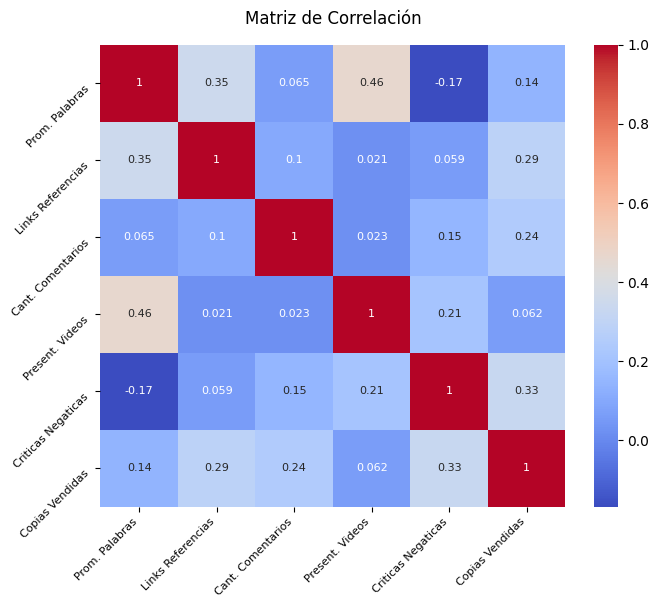

In [17]:
correlation = x.corr()

plt.figure(figsize=(7.5, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlación', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados y alinear su texto
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados y alinear su texto
plt.show()

> 👁️‍🗨️ Pareciera haber una correlación media entre `Prom. Palabras` y `Present. Videos`.

> 👁️‍🗨️ Pese a ello, con una magnitud de 0.46 entre ambas, no lo considero -a priori- que sea tan grave como para requerir eliminar alguna de estas features como 'duplicada' de la otra.

👉🏻 Escalado de features ...

- Del `Análisis Exploratorio de Datos` se observó la enorme disparidad en los **rangos** entre las features.

- Para el caso de los `Arbol de Decisión` esto no impacta.

- Sin embargo para los algoritmos que se basan en calcular distancias, como por ejemplo el `K-Nearest Neighbors`, esto puede presentar un problema grave.

- Una noción del problema: si por ej. un feature A tiene un rango del 1-5, y un feature B tiene un rango de valores comprendido entre 1-1000000, al momento de calcular las distancias a los vecinos más cercanos, el feature A tendrá injustamente muchísima mayor relevancia que el feature B.

- Para mitigar esta disparidad se utiliza el `escalado` previo a entrenar los modelos basados en distancias.

- En el caso del `StandardScaler` ajusta (en gral. implica achicar) los valores de cada feature, de forma que sus datos queden centrados con un valor medio de 0, y una desviación estandar -1/+1.

In [27]:
scaler = StandardScaler()           # crear la instancia del scaler
x_scaled = scaler.fit_transform(x)  # ajustar las escalas a los features
x_scaled[:3]                        # una muestra

array([[ 0.07  , -0.1854, -0.5996, -0.4903, -0.5626,  3.976 ],
       [-0.0582, -0.0157, -0.5996,  1.5639, -0.817 , -0.0681],
       [-0.7434, -0.0793, -0.2237, -0.7838, -0.7731,  0.3247]])

👉🏻 Separar los datos en los conjuntos de **entrenamiento** y **prueba** ...

- Para algoritmos de clasificación, conviene activar la `estratificación` como salvaguarda en caso que las clases estén desbalanceadas.
- Esto analiza el dataset previo a la separación, y garantiza que se preserve el mismo ratio original de clases, sobre los conjuntos de entrenamiento y prueba resultantes.
- Más info al respecto en la sección `Referencias`.

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1234)

## 🌳 Parte 4. **Algoritmo Árbol de Decisión**

👉🏻 Entrenar el Árbol de Decisión ...

In [86]:
tree_model = DecisionTreeClassifier(random_state=1234)
tree_model.fit(x_train, y_train)

# hacer las predicciones sobre el conj. de test
tree_y_pred = tree_model.predict(x_test)

# calcular la métrica 'accuracy' (exactitud)
tree_accuracy = accuracy_score(y_test, tree_y_pred)

# calcular la métrica 'f1-score'
# esta es un balance entre 'precisión' (error tipo I) y 'sensibilidad/recall' (error tipo II)
tree_f1_score = f1_score(y_test, tree_y_pred)

# mostrar los resultados
print(f"Árbol:  accuracy={ round(tree_accuracy, 4) }   f1-score={ round(tree_f1_score, 4) }")

Árbol:  accuracy=0.9697   f1-score=0.973


👉🏻 Métricas en detalle ...

In [91]:
# calcular sus métricas
tree_conf_matrix = confusion_matrix(y_test, tree_y_pred)
tree_accuracy = accuracy_score(y_test, tree_y_pred)
tree_f1_score = f1_score(y_test, tree_y_pred)
tree_report = classification_report(y_test, tree_y_pred)

# mostrar resultados
print("** Árbol de Decisión **  (conj. de test)", "\n")
print("Matriz de confusión:")
print(tree_conf_matrix, "\n")
print("Accuracy: ", round(tree_accuracy, 4))
print("F1-Score: ", round(tree_f1_score, 4), "\n")
print("Reporte: ")
print(tree_report)

** Árbol de Decisión **  (conj. de test) 

Matriz de confusión:
[[14  1]
 [ 0 18]] 

Accuracy:  0.9697
F1-Score:  0.973 

Reporte: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



### 💡 Observaciones

> 👁️‍🗨️ En el caso del `Árbol de Decisión` (conjunto de test), se logró una `accuracy=0.9697` y un `f1-score=0.973`.

> 👁️‍🗨️ Creo que es un resultado excelente, bastante cercano al 1 ideal.

## 🧮 Parte 5. **Algoritmo K-Nearest Neighbors (KNN)**

> Voy a utilizar un bucle para probar distitos valores para el `hiperparámetro k`, y determinar de acuerdo a las métricas el mejor modelo `KNN` disponible. 💪🏻

👉🏻 Entrenar los K-Nearest Neighbors ...

In [75]:
best_model = None
best_score = 0

k_values = range(1, 11, 2) # 1, 3, 5, 7, 9

for k in k_values:

  # instanciar el algoritmo KNN y entrenar el modelo
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train)

  # hacer las predicciones sobre el conj. de test
  knn_y_pred = knn_model.predict(x_test)

  # calcular la métrica 'accuracy' (exactitud)
  knn_accuracy = accuracy_score(y_test, knn_y_pred)

  # calcular la métrica 'f1-score'
  # esta es un balance entre 'precisión' (error tipo I) y 'sensibilidad/recall' (error tipo II)
  knn_f1_score = f1_score(y_test, knn_y_pred)

  # guardar el mejor modelo
  if knn_f1_score > best_score:
    best_model = knn_model
    best_score = knn_f1_score

  # mostrar los resultados
  print(f"KNN (k={ k }):    accuracy={ round(knn_accuracy, 4) } \t f1-score={ round(knn_f1_score, 4) }")

KNN (k=1):    accuracy=0.697 	 f1-score=0.7059
KNN (k=3):    accuracy=0.6667 	 f1-score=0.6857
KNN (k=5):    accuracy=0.7273 	 f1-score=0.7097
KNN (k=7):    accuracy=0.8182 	 f1-score=0.8333
KNN (k=9):    accuracy=0.7879 	 f1-score=0.8


> 👁️‍🗨️ Se observa de las métricas que el mejor modelo `KNN` resulta ser para `k=7`.

👉🏻 Métricas en detalle (para el mejor modelo) ...

In [87]:
# hacer las predicciones con el mejor modelo (conj. de test)
knn_y_pred = best_model.predict(x_test)

In [90]:
# calcular sus métricas
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1_score = f1_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

# mostrar resultados
print("** K-Nearest Neighbors **  (conj. de test, k=7)", "\n")
print("Matriz de confusión:")
print(knn_conf_matrix, "\n")
print("Accuracy: ", round(knn_accuracy, 4))
print("F1-Score: ", round(knn_f1_score, 4), "\n")
print("Reporte: ")
print(knn_report)

** K-Nearest Neighbors **  (conj. de test, k=7) 

Matriz de confusión:
[[12  3]
 [ 3 15]] 

Accuracy:  0.8182
F1-Score:  0.8333 

Reporte: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.83      0.83      0.83        18

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33



### 💡 Observaciones

> 👁️‍🗨️ En el caso de `K-Nearest Neighbors`, para un hiperparámetro `k=7` es que se obtuvo el mejor modelo (conjunto de test).

> 👁️‍🗨️ Detalle de las métricas: se logró una `accuracy=0.8182` y un `f1-score=0.8333`.

> 👁️‍🗨️ Creo que es un resultado aceptable, aunque no tan cercano al 1 ideal.


## 💡 Parte 6. **Conclusiones**

👉🏻 Resultados finales (conjunto de test):

- Mediante `Árbol de Decisión` se logra una `accuracy=0.9697` y un `f1-score=0.973`.

- En el caso de `K-Nearest Neighbors` con un `k=7` se logró una `accuracy=0.8182` y un `f1-score=0.8333`.

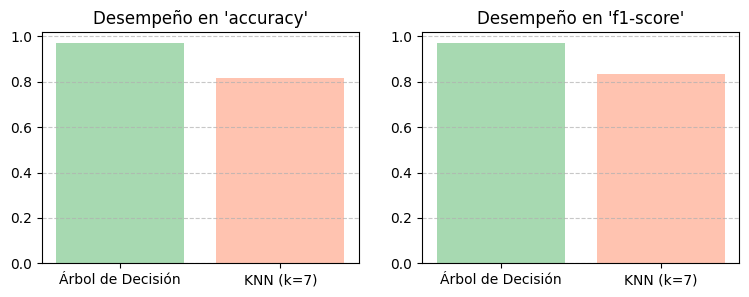

In [92]:
labels = ["Árbol de Decisión", "KNN (k=7)"]
colors = ['#A7D9B1', '#FFC3B0'] # '#FFFFB5'
accuracy = [tree_accuracy, knn_accuracy]
f1_score = [tree_accuracy, knn_f1_score]

plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.bar(labels, accuracy, color=colors)
plt.title("Desempeño en 'accuracy'")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.bar(labels, f1_score, color=colors)
plt.title("Desempeño en 'f1-score'")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

👉🏻 Tunning en el **K-Nearest Neighbors** ...

> 👁️‍🗨️ Habiendo determinado a `k=7` como valor óptimo, sus métricas mejoraron bastante respecto a los otros valores.  
> 👁️‍🗨️ En este tipo de algoritmos el `ajuste fino` resulta fundamental.

👉🏻 **Árbol de Decisión** vs **K-Nearest Neighbors** ...

> 👁️‍🗨️ Para este dataset en particular recomendaría utilizar el modelo entrenado mediante `Árbol de Decisión`, ya que su desempeño resultó excelente (y a la vez bastante superior al del `KNN`).

👉🏻 Otras consideraciones ...

> 👁️‍🗨️ Resaltar la importancia de hacer un buen preprocesamiento previo de los datos (imputación de nulos, chequeo de duplicados, escalado de features, etc) por para lograr mejores modelos.

## 📚 Referencias

- Uso de estratificación cuando las clases están desbalanceadas  
  https://scikit-learn.org/stable/modules/cross_validation.html#stratification